# 실시간 멜론 음원 차트를 확인해보세요!

In [ ]:
import requests
from bs4 import BeautifulSoup

if __name__ == "__main__":
    RANK = int(input("몇 위까지의 노래를 보고 싶으신가요? ")) # 멜론 차트 순위, 사용자가 원하는 만큼의 차트순위를 입력하는 것이 가능합니다.
    print("-"*50)
    header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.55 Safari/537.36 Edg/96.0.1054.43'}
    req = requests.get('https://www.melon.com/chart/index.htm', headers =header) # request라이브러리를 이용하여  원하는 url의 http 요청을 받아옵니다.
    html = req.text # 받아온 데이터를 text로 변환합니다.
    parse = BeautifulSoup(html, 'html.parser') # BeautifulSoup 라이브러리를 이용하여 html로 파싱합니다.
 
    titles = parse.find_all("div", {"class": "ellipsis rank01"}) 
    singers = parse.find_all("div", {"class": "ellipsis rank02"}) 
 
    title = []
    singer = []
 
    for t in titles:
        title.append(t.find('a').text)
 
    for s in singers:
        singer.append(s.find('span', {"class": "checkEllipsis"}).text)
 
    for i in range(RANK):
        print("랭킹 : %d위" % (i + 1))
        print('곡명 : %s' % title[i])
        print('가수 : %s' % singer[i])
        print("-"*50)

몇 위까지의 노래를 보고 싶으신가요? 10
--------------------------------------------------
랭킹 : 1위
곡명 : Counting Stars (Feat. Beenzino)
가수 : BE'O (비오)
--------------------------------------------------
랭킹 : 2위
곡명 : 회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)
가수 : sokodomo
--------------------------------------------------
랭킹 : 3위
곡명 : 리무진 (Feat. MINO) (Prod. GRAY)
가수 : BE'O (비오)
--------------------------------------------------
랭킹 : 4위
곡명 : ELEVEN
가수 : IVE (아이브)
--------------------------------------------------
랭킹 : 5위
곡명 : 만남은 쉽고 이별은 어려워 (Feat. Leellamarz) (Prod. TOIL)
가수 : 베이식 (Basick)
--------------------------------------------------
랭킹 : 6위
곡명 : 눈이 오잖아(Feat.헤이즈)
가수 : 이무진
--------------------------------------------------
랭킹 : 7위
곡명 : 사랑은 늘 도망가
가수 : 임영웅
--------------------------------------------------
랭킹 : 8위
곡명 : 불협화음 (Feat. AKMU) (Prod. GRAY)
가수 : Mudd the student
--------------------------------------------------
랭킹 : 9위
곡명 : strawberry moon
가수 : 아이유
---------------------------------------------

# 어떤 가수가 지금 가장 핫할까요? 분석해드립니다.

In [ ]:
singer_list = []
singer_num = []

len = 0

for i in range(100):
  if ',' in singer[i]:
    tmp = singer[i].split(', ')
    for j in tmp:
      singer_list.append(j)
      len += 1
  else:
    singer_list.append(singer[i])
    len += 1

n_singer_list = []

for i in range(len):
  cnt = 1
  for j in range(i+1,len):
    if (singer_list[i] == singer_list[j]) & (singer_list[i] != 0) :
      cnt += 1
      singer_list[j] = 0
  if singer_list[i] != 0:
    singer_num.append(cnt)
    n_singer_list.append(singer_list[i])


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

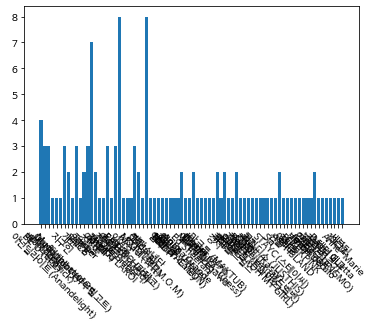

현재 멜론 차트 TOP 100 에 가장 많은 비중을 차지하고 있는 가수는 ['임영웅', '방탄소년단'] 입니다.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.font_manager as fm
 

plt.rc('font', family='NanumBarunGothic') 

len2 = 0

for i in n_singer_list:
  len2 += 1

x = np.arange(len2)
plt.bar(x,singer_num)
plt.xticks(x,n_singer_list)
plt.xticks(rotation = - 45 )
plt.show()

max = 0
index = 0
max_singer_list = []

for i in range(len2):
  if singer_num[i] >= max:
    max = singer_num[i]
    index = i

if singer_num.count(max)>1:
  j=0
  for i in range(len2):
    if singer_num[i] == max:
      max_singer_list.append(n_singer_list[i])
else :
  max_singer_list.append(n_singer_list[index])

print("현재 멜론 차트 TOP 100 에 가장 많은 비중을 차지하고 있는 가수는 %s 입니다." % max_singer_list)

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!sudo apt install tesseract-ocr-kor
!pip install googletrans==4.0.0-rc1

# 가장 인기 있는 가수의 유튜브 영상을 바로 확인해보세요!

In [ ]:
import pytesseract
import cv2
from google.colab.patches import cv2_imshow
import googletrans
from googletrans import Translator

translator = Translator()

for i in max_singer_list:
  print("%s 가수의 유튜브 영상 링크 : " % i , end = '')
  trans = translator.translate(i,src='ko',dest='en')
  url = 'https://www.youtube.com/results?search_query=' + trans.text.replace(' ','')
  print(url)
  print("\n")

임영웅 가수의 유튜브 영상 링크 : https://www.youtube.com/results?search_query=LimYoungWoong


방탄소년단 가수의 유튜브 영상 링크 : https://www.youtube.com/results?search_query=BTS




# 나만의 유튜브 플레이 리스트를 만들어 봅시다!

In [ ]:
import datetime
main = """
  1. 플레이 리스트 리셋하여 새로 만들기
  2. 플레이 리스트에 노래 추가하기
  3. 저장하기 OR 그만두기
"""
print("-"*25 + "메뉴" + "-"*25)
print(main)
print("-"*54)

def create():
  memo = input("""
추가하고 싶은 노래의 제목과 유튜브 링크를 입력해주세요
' '(공백)으로 구분하여 입력해주세요! >> """)
  with open('playlist.txt','w') as f:
    f.write(f'{memo}\n')
def append():
  memo = input("""
추가하고 싶은 노래의 제목과 유튜브 링크를 입력해주세요
' '(공백)으로 구분하여 입력해주세요! >> """)
  with open('playlist.txt','a') as f:
    f.write(f'{memo}\n')

while True:
  menu = int(input("- 메뉴를 선택하세요 - "))
  if menu == 1:
    create()
  elif menu == 2:
    append()
  else:
    print("저장했습니다!")
    break
  print("\n<현재 나의 플레이 리스트>\n")
  with open('playlist.txt','r') as f:
    for line in f.readlines():
      print(line,end='') 
      print("\n")

-------------------------메뉴-------------------------

  1. 플레이 리스트 리셋하여 새로 만들기
  2. 플레이 리스트에 노래 추가하기
  3. 저장하기 OR 그만두기

------------------------------------------------------
- 메뉴를 선택하세요 - 1

추가하고 싶은 노래의 제목과 유튜브 링크를 입력해주세요
' '(공백)으로 구분하여 입력해주세요! >> 사랑을했다 https://www.youtube.com/watch?v=vecSVX1QYbQ

<현재 나의 플레이 리스트>

사랑을했다 https://www.youtube.com/watch?v=vecSVX1QYbQ


- 메뉴를 선택하세요 - 3
저장했습니다!


## 나만의 플레이 리스트 완성!

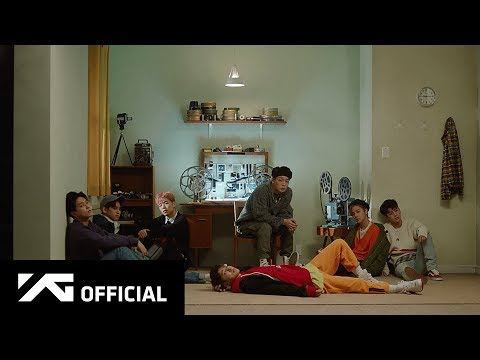

In [ ]:
from IPython.display import YouTubeVideo, display 

with open('playlist.txt','r') as f:
  for line in f.readlines():
    mysong = line.split(' ')[1]
    mysonglink = mysong.split('v=')[1]
    mysonglink2 = mysonglink.split('\n')[0]
    video = YouTubeVideo(mysonglink2, width=500) 
    display(video)